# THE FIRST MODEL
REALLY SUCKS BTW

In [1]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [2]:
import matplotlib.pyplot as plt

In [3]:
Batch_size = 120
img_height = 244
img_width = 244

In [4]:
# import os 

# dir_path = "Datasets"
# name = os.listdir(dir_path)
# all_path = []

# for i in name :
#     new_path = "{}/{}".format(dir_path,i) 
#     all_path.append(new_path)

In [5]:
# from PIL import Image

# iter = 0
# for i in all_path:
#     extension = ".jpg" # set the file extension you want to search for her
#     iter2 = 0
#     # loop through all files in the directory
#     for filename in os.listdir(i):
#         if filename.endswith(extension):
#             image = Image.open("{}/{}".format(i,filename))
#             ubah = image.resize((244,244))
            
#             new_name = "Data_Resize/{}/{}_{}.jpg".format(name[iter],name[iter],iter2)
#             ubah.save(new_name)
#             iter2 = iter2 + 1
            
#     iter = iter + 1

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    validation_split=0.2,
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=True,
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5, 1.5],
    shear_range=0.2,
    zoom_range=[0.8, 1.2],
    channel_shift_range=10.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255)

validation_datagen = ImageDataGenerator(
    rescale = 1./255.,
    validation_split=0.2,)


d:\Anaconda3\lib\site-packages\keras\preprocessing\image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [7]:
data_dir = "Data_Resize"

train_ds = datagen.flow_from_directory(
	data_dir,
	class_mode='categorical',
  	batch_size=Batch_size,
    subset = 'training',
    shuffle=True,
)

val_ds = validation_datagen.flow_from_directory(
	data_dir,
	class_mode='categorical',
  	batch_size=Batch_size,
    subset = 'validation',
    shuffle=True,
)

Found 923 images belonging to 10 classes.
Found 225 images belonging to 10 classes.


d:\Anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
d:\Anaconda3\lib\site-packages\keras\preprocessing\image.py:1884: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
d:\Anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


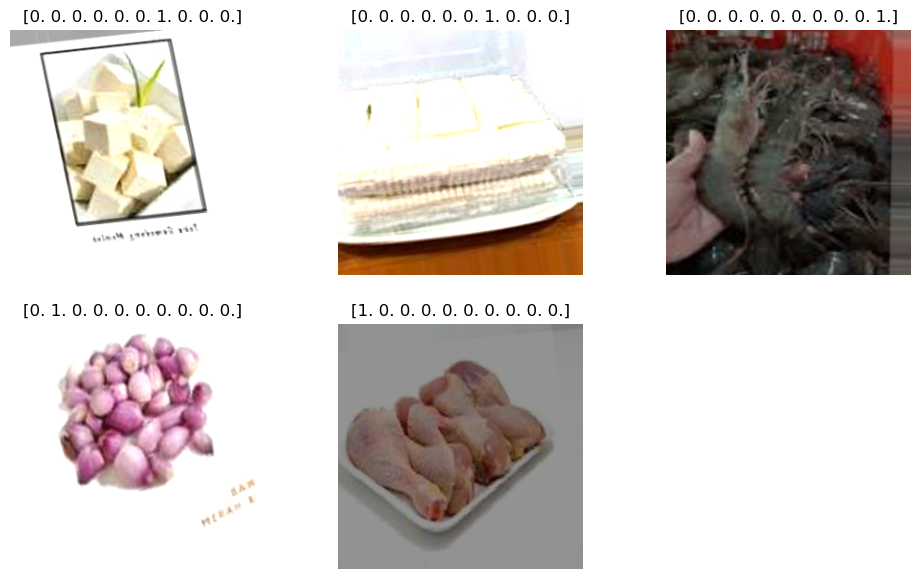

In [8]:
plt.figure(figsize=(12, 7))

x,y = train_ds.next()

for i in range (5) :
    gambar = x[i,:,:,:]
    label = y[i,:]
    plt.subplot(2, 3, i + 1)
    plt.imshow(gambar)
    plt.title(label)
    plt.axis("off")

In [9]:
print(x.shape)

(120, 256, 256, 3)


In [10]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense

# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(244, 244,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10))
# model.add(Activation('softmax'))

# # Print the model summary
# model.summary()

In [11]:
# # Set the training parameters
# model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=(2,2), input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(16, (5, 5), strides=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    # 10 classes
    tf.keras.layers.Dense(10, activation='softmax')
  ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 260, 260, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 86, 86, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 43, 43, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 41, 41, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                        

In [13]:
# another training parameter (klo pake ini somehow error)
model.compile(optimizer = tf.optimizers.legacy.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(
        train_ds,
        steps_per_epoch=956 // Batch_size,
        epochs=50,
        validation_data=val_ds,
        validation_steps=234 // Batch_size)

Epoch 1/50
7/7 [==============================] - 69s 9s/step - loss: 2.3586 - accuracy: 0.1183 - val_loss: 2.3050 - val_accuracy: 0.1250
Epoch 2/50
6/7 [========================>.....] - ETA: 6s - loss: 2.3028 - accuracy: 0.1230 

KeyboardInterrupt: 

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# training_datagen = ImageDataGenerator(
#       rescale = 1./255,
# 	rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')

# validation_datagen = ImageDataGenerator(rescale = 1./255)

# train_generator = training_datagen.flow(train_ds)
# test_generator = training_datagen.flow(test_ds)
# model.save("test_model.h5")

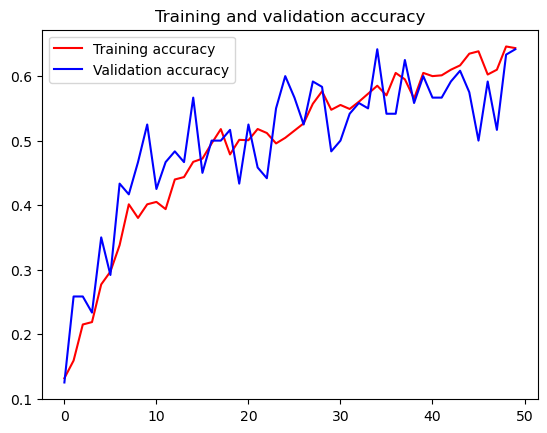

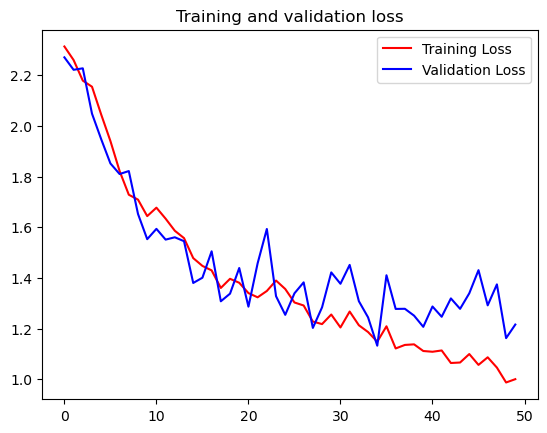

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
valid_datagen = ImageDataGenerator(
    rescale = 1./255 )

In [ ]:
test_gen = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE)
)

In [ ]:
from PIL import Image
im = Image.open(r"Data_Resize/Kambing/Kambing_5.jpg")
im.show()

In [ ]:
from PIL import Image
import numpy as np
from tensorflow import keras

# Load image
im = Image.open(r"Data_Resize/Kambing/Kambing_5.jpg")

# Preprocess the image
im = im.resize((256, 256))
arr = np.array(im)
arr = (arr - arr.min()) / (arr.max() - arr.min())

# Load pre-trained model
# model = keras.models.load_model("path/to/model.h5")

# Make prediction
prediction = model.predict(np.expand_dims(arr, axis=0))

# Post-process the prediction
predicted_class = np.argmax(prediction)


1/1 [==============================] - 0s 60ms/step


In [ ]:
predicted_class

4

In [ ]:
valid_datagen = ImageDataGenerator(
    rescale = 1./255 )

In [ ]:
valid_datagen = ImageDataGenerator(
    rescale = 1./255 )

In [ ]:
valid_datagen = ImageDataGenerator(
    rescale = 1./255 )

In [ ]:
valid_datagen = ImageDataGenerator(
    rescale = 1./255 )

# Load Model
asdasd

In [1]:
import keras
load_model = keras.models.load_model("test_model.h5")

In [7]:
img_dir+os.listdir(img_dir)[0]

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/DatasetsV5/test/ayam'

In [6]:
import tensorflow as tf
import os
import sys

img_dir= "/DatasetsV5/test/ayam"
class_names = os.listdir("../DatasetsV5/test/")

correct = 0
for i,img in enumerate(os.listdir(img_dir)):   
    sunflower_path = img_dir + img

    img = tf.keras.utils.load_img(
        sunflower_path, target_size=(224, 224)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    if(class_names[np.argmax(score)]=="Ayam"): correct += 1
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

print("Jumlah data benar", correct)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/DatasetsV5/test/ayam'

# SECOND MODEL

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',)

In [ ]:
data_dir = "Datasets"

train_ds = datagen.flow_from_directory(
	data_dir,
	target_size=(150,150),
	class_mode='categorical',
  	batch_size=128,
    subset = 'training',
    shuffle=False,
)

val_ds = datagen.flow_from_directory(
	data_dir,
	target_size=(150,150),
	class_mode='categorical',
  	batch_size=128,
    subset = 'validation',
    shuffle=False,
)

Found 956 images belonging to 10 classes.
Found 234 images belonging to 10 classes.


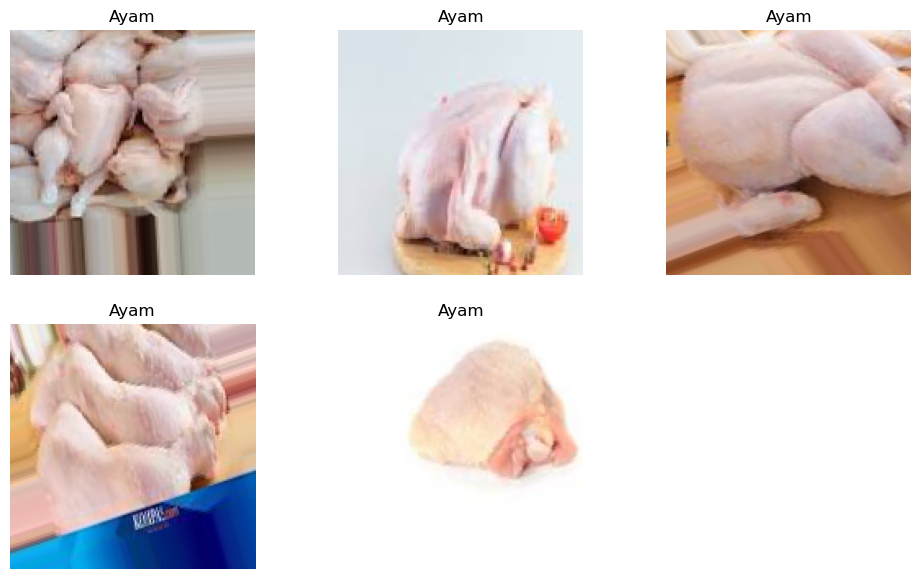

In [ ]:
import numpy as np
n = 5
plt.figure(figsize=(12, 7))
x,y = train_ds.next()
for i in range(0,n):
    image_x = x[i,:,:,:]
    ax = plt.subplot(2, 3, i + 1)
    label= list(train_ds.class_indices)[np.where(y[0]==1)[0][0]]
    plt.title(label)
    plt.imshow(image_x)
    plt.axis("off")

In [ ]:
IMG_SHAPE = (150,150, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 10s 1us/step


In [ ]:
base_model.trainable = False

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(10, activation="softmax")

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
validation_steps=20
initial_epochs = 100

history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/100
8/8 [==============================] - 32s 4s/step - loss: 2.0491 - accuracy: 0.2960 - val_loss: 1.8835 - val_accuracy: 0.3718
Epoch 2/100
8/8 [==============================] - 30s 4s/step - loss: 2.0470 - accuracy: 0.2960 - val_loss: 1.9928 - val_accuracy: 0.2735
Epoch 3/100
8/8 [==============================] - 23s 3s/step - loss: 1.9763 - accuracy: 0.3190 - val_loss: 1.9212 - val_accuracy: 0.3718
Epoch 4/100
8/8 [==============================] - 19s 2s/step - loss: 1.9886 - accuracy: 0.3169 - val_loss: 1.8724 - val_accuracy: 0.3034
Epoch 5/100
8/8 [==============================] - 17s 2s/step - loss: 1.9318 - accuracy: 0.3337 - val_loss: 1.8743 - val_accuracy: 0.3376
Epoch 6/100
8/8 [==============================] - 17s 2s/step - loss: 1.9408 - accuracy: 0.3368 - val_loss: 1.8481 - val_accuracy: 0.3333
Epoch 7/100
8/8 [==============================] - 17s 2s/step - loss: 1.8531 - accuracy: 0.3672 - val_loss: 1.8244 - val_accuracy: 0.3932
Epoch 8/100
8/8 [==========

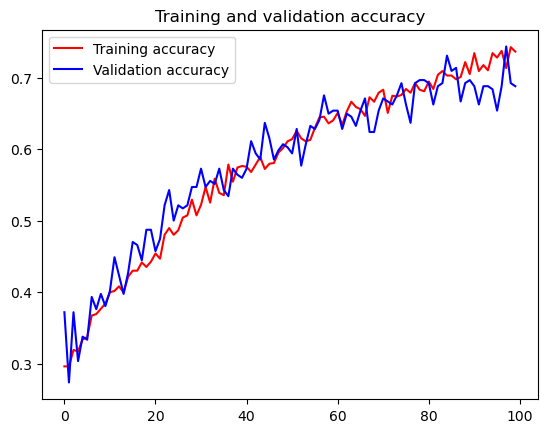

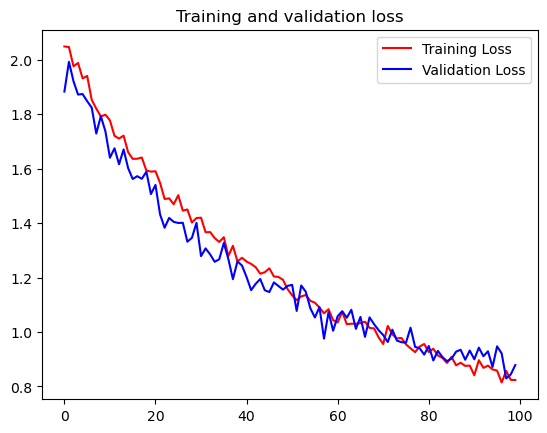

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
tf.saved_model.save(model,"ML/")

INFO:tensorflow:Assets written to: ML/assets


INFO:tensorflow:Assets written to: ML/assets
